# Fourier Transform

In [168]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [169]:
# load audio file in the player
audio_path = "audio/piano_c.wav"
ipd.Audio(audio_path)

In [170]:
# load audio file
signal, sr = librosa.load(audio_path)

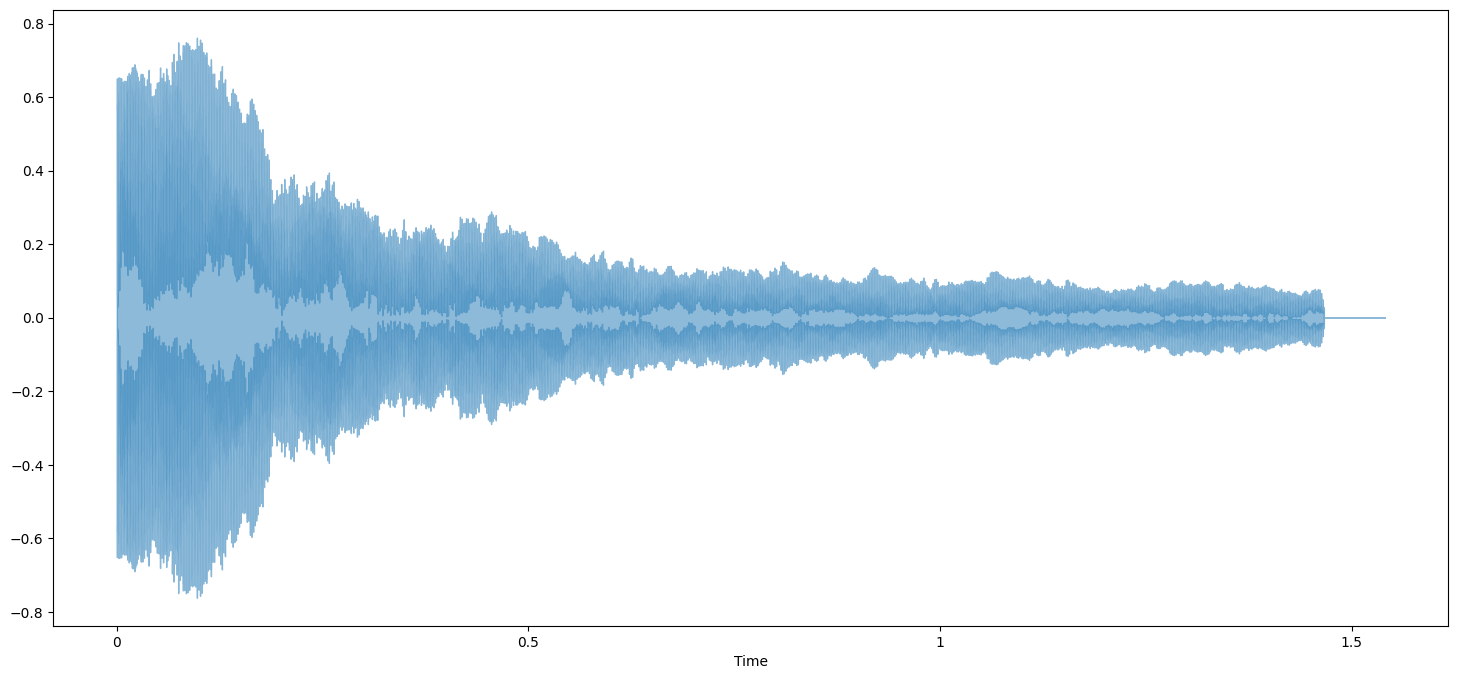

In [171]:
# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

In [172]:
# derive spectrum using FT -> Fast Fourier Transform
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude)) # sr = sampling rate

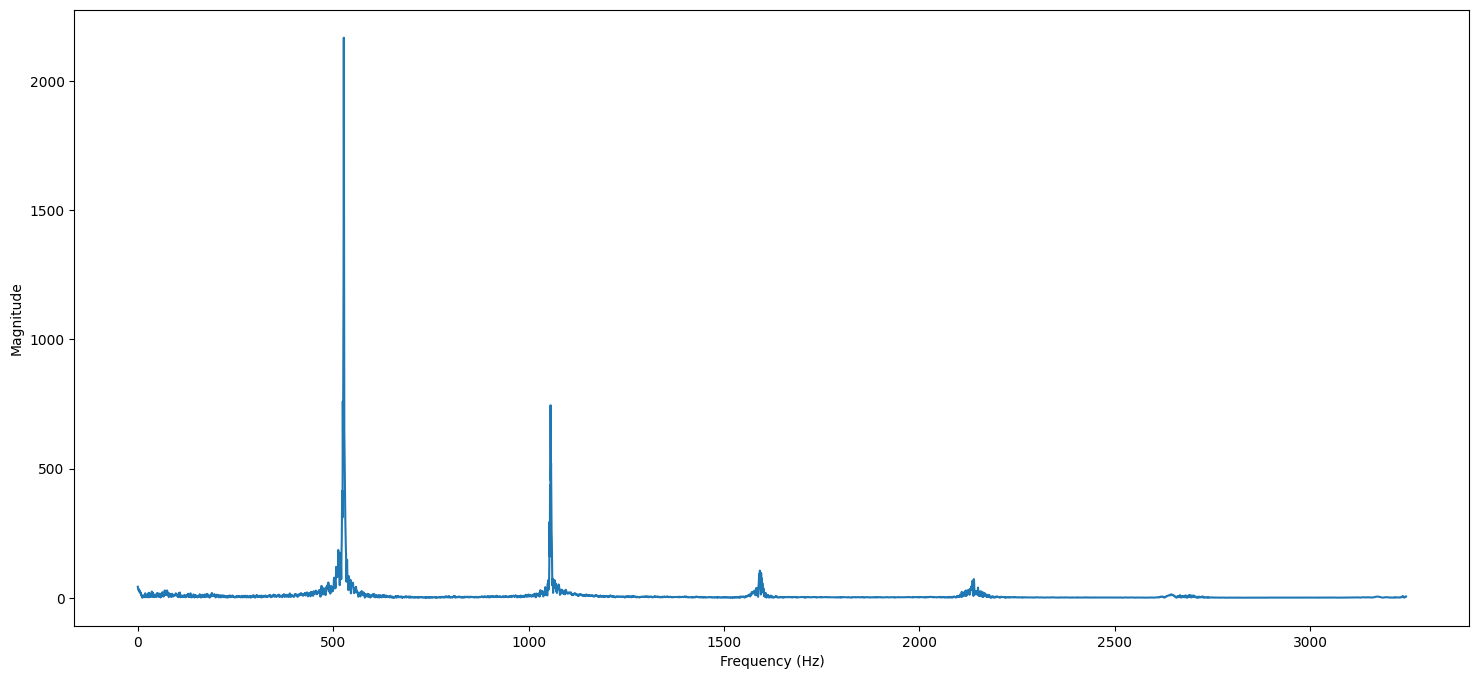

In [173]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [1]:
d_523 = 1 / 523
d_523
# complete circle every 0.0019120458891013384 seconds

0.0019120458891013384

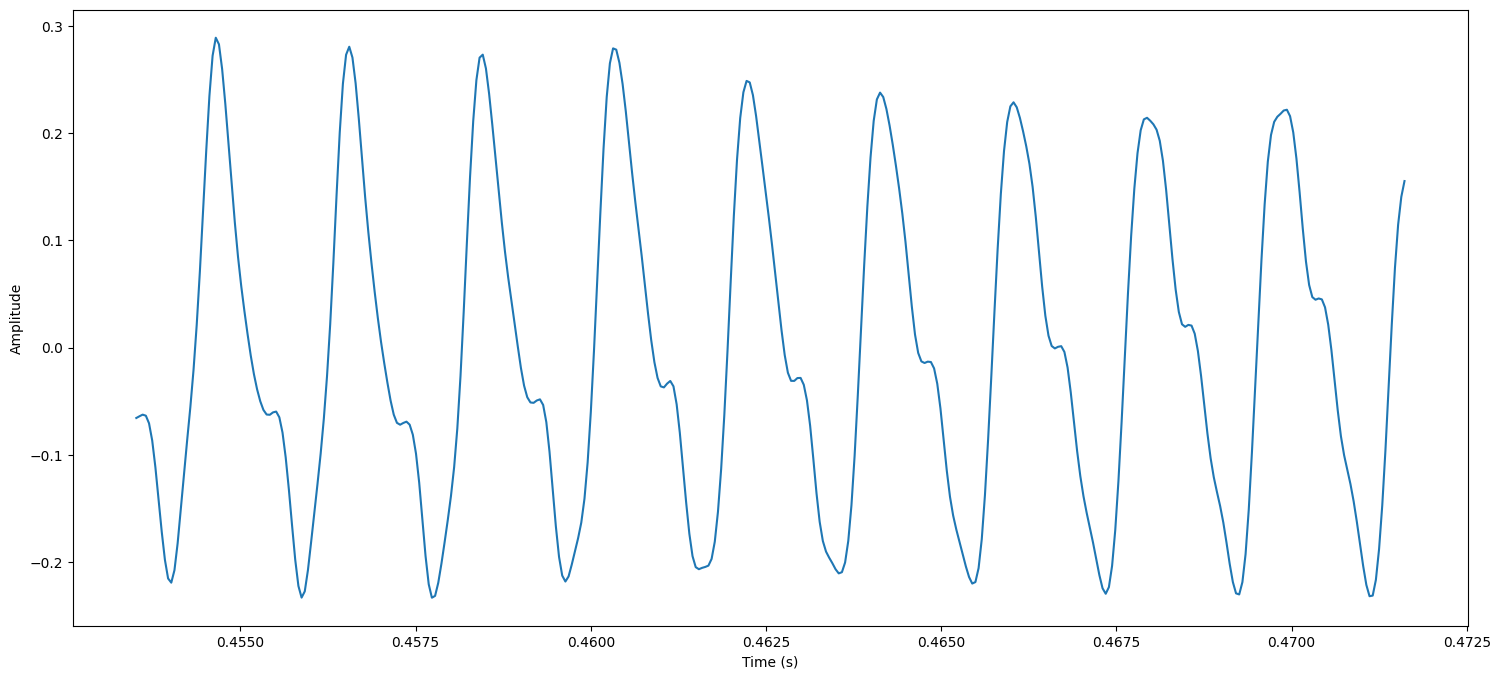

In [174]:
# zomm in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
# zoom in to the spectrum in the sample range 10000:10400

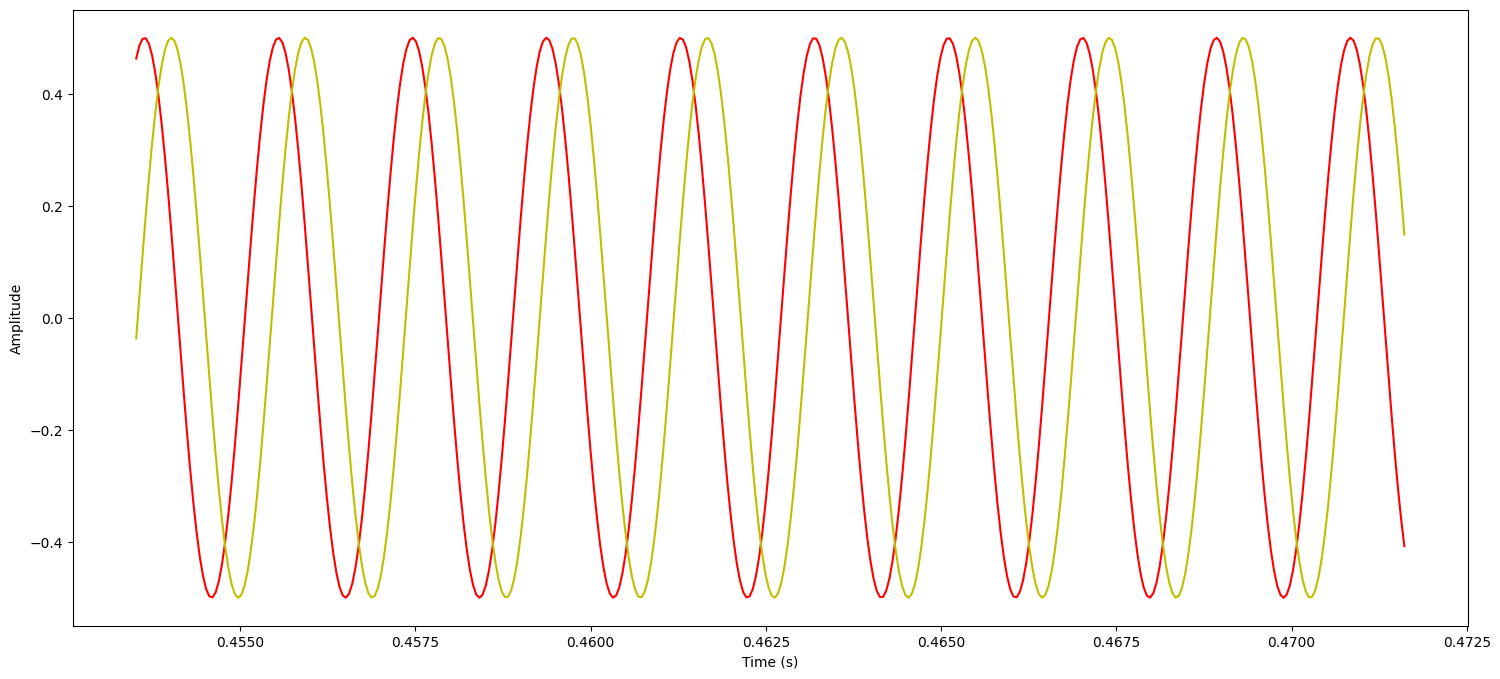

In [175]:
# create a sinusoid
# frequency = 523 Hz
f = 523
phase = 0
phase2 = 0.2
# formula: sin(2*pi*f*t - phase)
# We create two sinusoids with different phase values
# We want to choose a phase value that makes the sinusoid like the signal
sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

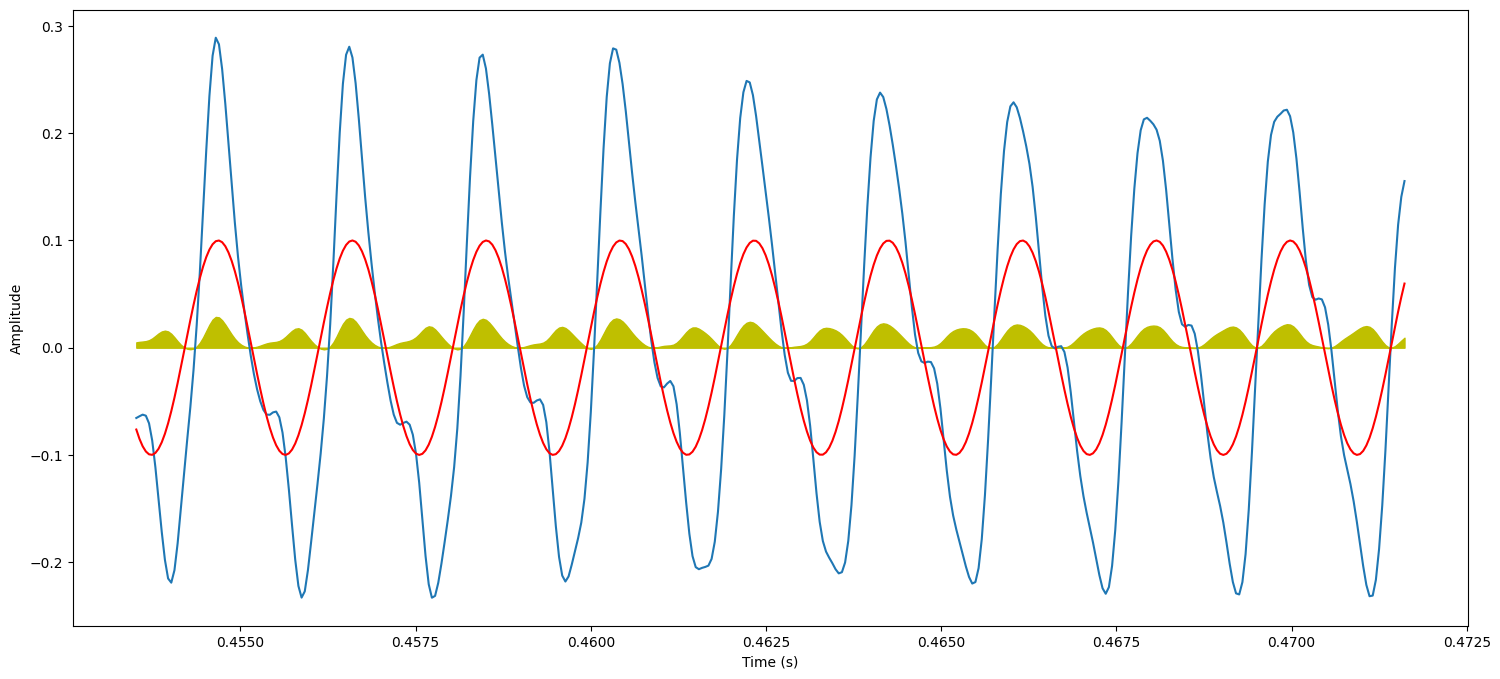

In [176]:
# compare signal and sinusoids

f = 523
#phase = 0.2
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

# fill the area between the signal and the sinusoid with yellow. If there is similarity, the area will be filled positively, otherwise negatively
plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
# magnitude of the area between the signal and the sinusoid is a measure of similarity between the two signals
# we do this for all the frequencies in the waveform and we get a similarity measure for each frequency

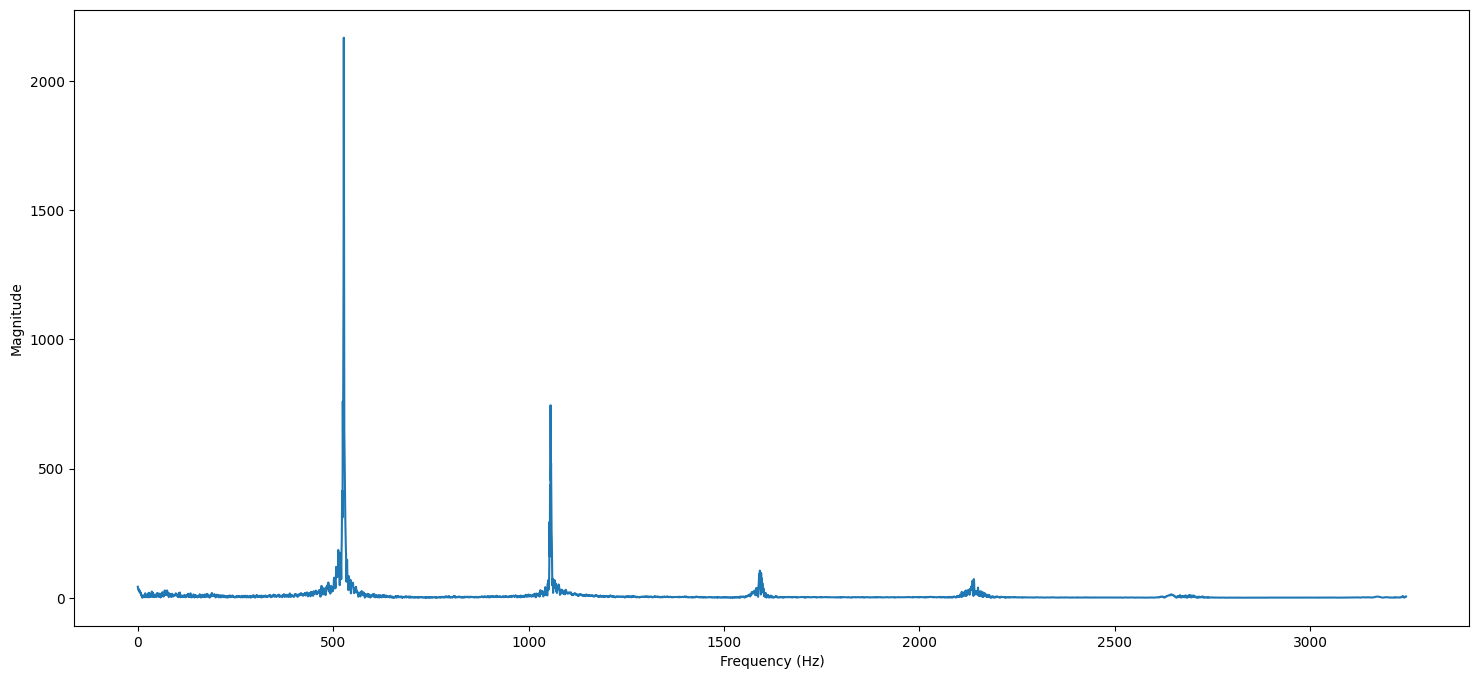

In [177]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

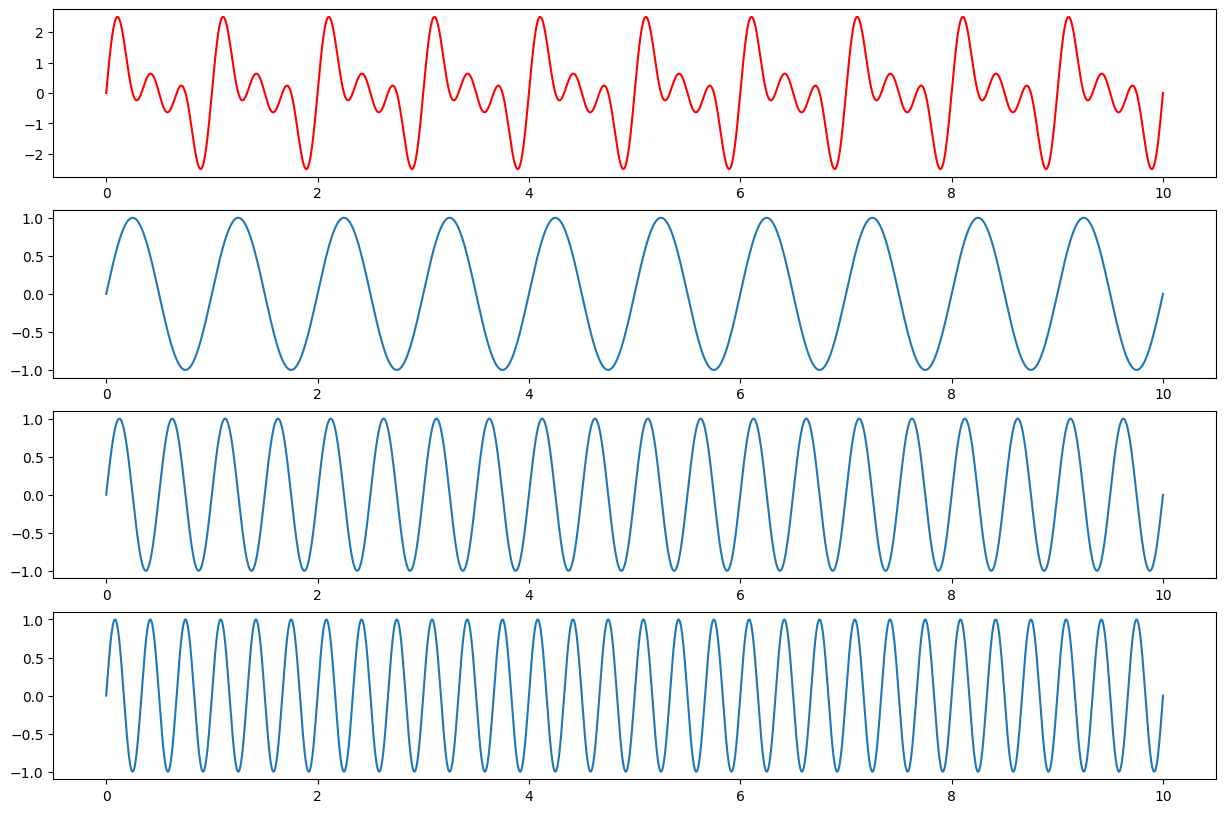

In [178]:
# superimposing pure tones
f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()